# Apartado 1

## Justificación de diseño

Los métodos `calcularMediasDesv()` y `normalizarDatos()` los hemos implementado dentro de la clase `ClasificadorVecinosProximos`, ya sólo los llamamos en este clasificador y eso nos permite hacer unos métodos más sencillos.


## Ejecución

Vamos a ver ahora los resultados del clasificador KNN para los diferentes conjuntos de datos y para diferentes valores de k.
Hemos usado validación simple con un 70% de train, ya que usar una más compleja no nos aporta ninguna mejora considerable y no es el objetivo de esta práctica.

Vamos a ejecutar primero KNN sin normalizar los datos y luego normalizando datos:

In [17]:
from ClasificadorVecinosProximos import ClasificadorVecinosProximos
from Datos import Datos
from ValidacionSimple import ValidacionSimple
from timeit import default_timer as timer

start = timer()

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4', 'wdbc']

val = ValidacionSimple(70)

valores_de_k = [1, 3, 5, 11, 21, 51]

print("Sin normalizar datos en knn:\n")
for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    val.creaParticiones(datos.datos)
    
    print(nombre_fichero, ":", sep='')
    for k in valores_de_k:
        knn = ClasificadorVecinosProximos(k)
        
        errores, tasa_de_error = knn.validacion(val, datos, knn, normalizar_datos=False)
        
        print("\tTasa de error k=", k, ":\t\t", tasa_de_error, sep='')

end = timer()
print("\nTiempo de ejecución sin normalizar:", end - start)

Sin normalizar datos en knn:

example1:
	Tasa de error k=1:		0.175
	Tasa de error k=3:		0.15833333333333333
	Tasa de error k=5:		0.16666666666666666
	Tasa de error k=11:		0.175
	Tasa de error k=21:		0.125
	Tasa de error k=51:		0.15833333333333333
example2:
	Tasa de error k=1:		0.0
	Tasa de error k=3:		0.0
	Tasa de error k=5:		0.0
	Tasa de error k=11:		0.0
	Tasa de error k=21:		0.0
	Tasa de error k=51:		0.0
example3:
	Tasa de error k=1:		0.03333333333333333
	Tasa de error k=3:		0.06666666666666667
	Tasa de error k=5:		0.03333333333333333
	Tasa de error k=11:		0.03333333333333333
	Tasa de error k=21:		0.041666666666666664
	Tasa de error k=51:		0.06666666666666667
example4:
	Tasa de error k=1:		0.03333333333333333
	Tasa de error k=3:		0.06666666666666667
	Tasa de error k=5:		0.13333333333333333
	Tasa de error k=11:		0.23333333333333334
	Tasa de error k=21:		0.3333333333333333
	Tasa de error k=51:		0.6333333333333333
wdbc:
	Tasa de error k=1:		0.07017543859649122
	Tasa de error k=3:		0.064

In [18]:
from ClasificadorVecinosProximos import ClasificadorVecinosProximos
from Datos import Datos
from ValidacionSimple import ValidacionSimple
from timeit import default_timer as timer

start = timer()

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4', 'wdbc']

val = ValidacionSimple(70)

valores_de_k = [1, 3, 5, 11, 21, 51]

print("Normalizando datos en knn:\n")
for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    val.creaParticiones(datos.datos)
    
    print(nombre_fichero, ":", sep='')
    for k in valores_de_k:
        knn = ClasificadorVecinosProximos(k)
        
        errores, tasa_de_error = knn.validacion(val, datos, knn, normalizar_datos=True)
        
        print("\tTasa de error k=", k, ":\t\t", tasa_de_error, sep='')

end = timer()
print("\nTiempo de ejecución sin normalizar:", end - start)

Normalizando datos en knn:

example1:
	Tasa de error k=1:		0.20833333333333334
	Tasa de error k=3:		0.15
	Tasa de error k=5:		0.11666666666666667
	Tasa de error k=11:		0.16666666666666666
	Tasa de error k=21:		0.09166666666666666
	Tasa de error k=51:		0.08333333333333333
example2:
	Tasa de error k=1:		0.0
	Tasa de error k=3:		0.0
	Tasa de error k=5:		0.0
	Tasa de error k=11:		0.0
	Tasa de error k=21:		0.0
	Tasa de error k=51:		0.0
example3:
	Tasa de error k=1:		0.016666666666666666
	Tasa de error k=3:		0.058333333333333334
	Tasa de error k=5:		0.008333333333333333
	Tasa de error k=11:		0.016666666666666666
	Tasa de error k=21:		0.025
	Tasa de error k=51:		0.03333333333333333
example4:
	Tasa de error k=1:		0.0
	Tasa de error k=3:		0.0
	Tasa de error k=5:		0.0
	Tasa de error k=11:		0.0
	Tasa de error k=21:		0.0
	Tasa de error k=51:		0.0
wdbc:
	Tasa de error k=1:		0.023391812865497075
	Tasa de error k=3:		0.04093567251461988
	Tasa de error k=5:		0.04093567251461988
	Tasa de error k=11:		0

Vemos que la diferencia de tiempos de ejecución entre KNN sin normalizar datos y normalizando datos es muy pequeña, mientras que la tasa de errores normalizando datos se reduce mucho.

Vemos tambien que aumentar el valor de k por encima de 11 no nos da grandes diferencias en la clasificación.

Llama mucho la atención que en example2 y example4 la tasa de error es 0. Esto podría parecer que es porque KNN está sobreajustando, pero en realidad, si analizamos los conjuntos de datos, vemos que es porque los conjuntos son muy sencillos.
En example2 los puntos se concentran en 4 posiciones y siempre con la misma clasificación y en example4 los datos siguen dos líneas rectas, cada una con una clasificación. Esto se puede ver fácilmente en las gráficas del apartado 3.


# Apartado 2

En este apartado vamos a probar regresión logística con cada uno de los conjuntos de datos y con diferentes valores para nepocas y para la constante de aprendizaje.

In [7]:
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from Datos import Datos
from ValidacionSimple import ValidacionSimple

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4', 'wdbc']

valores_de_const = [0.4, 0.6, 0.8, 1]
valores_de_nepocas = [1, 5, 10, 100]

val = ValidacionSimple(70)
reg = ClasificadorRegresionLogistica()

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    
    print(nombre_fichero, ":", sep='')
    
    val.creaParticiones(datos.datos)
    
    for const in valores_de_const:
        for nepocas in valores_de_nepocas:
            errores, tasa_de_error = reg.validacion(val, datos, reg, nepocas=nepocas, const=const)
            print("\tTasa de error const=", const, ", nepocas=", nepocas, ":\t\t", tasa_de_error, sep='')


example1:
	Tasa de error const=0.4, nepocas=1:		0.55
	Tasa de error const=0.4, nepocas=5:		0.4583333333333333
	Tasa de error const=0.4, nepocas=10:		0.55
	Tasa de error const=0.4, nepocas=100:		0.55
	Tasa de error const=0.6, nepocas=1:		0.475
	Tasa de error const=0.6, nepocas=5:		0.4583333333333333
	Tasa de error const=0.6, nepocas=10:		0.44166666666666665
	Tasa de error const=0.6, nepocas=100:		0.5166666666666667
	Tasa de error const=0.8, nepocas=1:		0.4583333333333333
	Tasa de error const=0.8, nepocas=5:		0.5
	Tasa de error const=0.8, nepocas=10:		0.4583333333333333
	Tasa de error const=0.8, nepocas=100:		0.5166666666666667
	Tasa de error const=1, nepocas=1:		0.5333333333333333
	Tasa de error const=1, nepocas=5:		0.5083333333333333
	Tasa de error const=1, nepocas=10:		0.43333333333333335
	Tasa de error const=1, nepocas=100:		0.575
example2:
	Tasa de error const=0.4, nepocas=1:		0.5083333333333333
	Tasa de error const=0.4, nepocas=5:		0.2833333333333333
	Tasa de error const=0.4, nepoc

Vemos que para example1, 2 y 3 regresión logística es un mal clasificador. Si analizamos los datos, podemos ver que están distribuidos de tal manera que es imposible dividirlos con una sola línea recta y tener una buena clasificación.
Para example4 la tasa de error es 0, y esto no es debido a un sobreajuste sino a que los datos están agrupados en dos rectas paralelas y por tanto regresión logística puede dividirlos muy fácilmente trazando una recta paralela que pase entre ellos.

Podemos ver que, en general, aumentar nepocas disminuye la tasa de errores, pero ello es a costa de aumentar el tiempo de entrenamiento necesario. Sin embargo aumentar nepocas no aumenta el tiempo de clasificación.
Vemos que variar la constante de aprendizaje no afecta altamente al resultado, pero es preferible que sea ligeramente menor que 1

# Apartado 3

## KNN SkLearn

Hemos implementado vecinos próximos con la biblioteca de Scikit-Learn. Hemos probado con peso uniforme y en función de la distancia.

In [15]:
from Datos import Datos
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from ValidacionSimple import ValidacionSimple
import numpy as np
import itertools

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4', 'wdbc']
val = ValidacionSimple(70)
valores_de_k = [1, 3, 5, 11, 21, 51]
pesos = ['uniform', 'distance']

for peso in pesos:
    print ("\nPeso =", peso)
    for nombre_fichero in conjuntos_de_datos:
        datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
        val.creaParticiones(datos.datos) #Se usa Validacion Simple

        # Normalizo los datos
        datos_normalizados = preprocessing.normalize(datos.datos, axis=0)
        datos_normalizados[:,-1] = datos.datos[:,-1]

        # ndarray para los datos de test que no incluye la clase
        X = np.zeros((len(val.particiones[0].indicesTrain),len(datos.nominalAtributos)-1))
        y = []
        # Completo ndarrays X e y
        for n, indiceTrain in enumerate(val.particiones[0].indicesTrain):
            X[n]=datos_normalizados[indiceTrain,:-1]
            y.append(datos_normalizados[indiceTrain,-1])

        print(nombre_fichero, ":", sep='')
        for k in valores_de_k:
            SK_KNN = KNeighborsClassifier(n_neighbors=k, weights=peso)    # Clasificador KNN de sklearn
            SK_KNN.fit(X, y)    # Ingreso los Datos al modelo

            # clasifica todos los datos de datos.datos y los guarda en predicho
            predicho=[]
            for dato in datos_normalizados:
                predicho.append(SK_KNN.predict([dato[:-1]]))

            # errores para los datos de Test y tasa de error correspondiente
            errores = []
            for n, indiceTest in enumerate(val.particiones[0].indicesTest):
                errores.append(datos_normalizados[indiceTest,-1] != predicho[indiceTest])
            errores = list(itertools.chain.from_iterable(errores))
            tasa_de_error = sum(errores) / len(errores)

            print("\tTasa de error k=", k, ":\t\t", tasa_de_error, sep='')



Peso = uniform
example1:
	Tasa de error k=1:		0.15833333333333333
	Tasa de error k=3:		0.16666666666666666
	Tasa de error k=5:		0.16666666666666666
	Tasa de error k=11:		0.16666666666666666
	Tasa de error k=21:		0.15
	Tasa de error k=51:		0.225
example2:
	Tasa de error k=1:		0.0
	Tasa de error k=3:		0.0
	Tasa de error k=5:		0.0
	Tasa de error k=11:		0.0
	Tasa de error k=21:		0.0
	Tasa de error k=51:		0.0
example3:
	Tasa de error k=1:		0.041666666666666664
	Tasa de error k=3:		0.025
	Tasa de error k=5:		0.025
	Tasa de error k=11:		0.008333333333333333
	Tasa de error k=21:		0.025
	Tasa de error k=51:		0.03333333333333333
example4:
	Tasa de error k=1:		0.0
	Tasa de error k=3:		0.0
	Tasa de error k=5:		0.0
	Tasa de error k=11:		0.0
	Tasa de error k=21:		0.0
	Tasa de error k=51:		0.16666666666666666
wdbc:
	Tasa de error k=1:		0.04093567251461988
	Tasa de error k=3:		0.029239766081871343
	Tasa de error k=5:		0.023391812865497075
	Tasa de error k=11:		0.04093567251461988
	Tasa de error k=21:

Vemos que, en general tenemos tasas de error parecidas a las que tiene nuestro algoritmo de KNN.
Vemos también que poner el peso en función de la distancia hace que disminuyan nuestras tasa de error.

## Regresión logística SkLearn

Hemos implementado regresión logística con la bilbioteca de Scikit-learn usando el algoritmo 'sag'

In [16]:
import itertools

import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from Datos import Datos
from ValidacionSimple import ValidacionSimple

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4', 'wdbc']
val = ValidacionSimple(70)
algoritmo = 'sag'  # Usaremos SAG = Stochastic Average Gradient
pesoClase = 'balanced'

nrosepocas = [1, 5, 10, 100]
constantes = [0.4, 0.6, 0.8, 1.0]

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    val.creaParticiones(datos.datos)  # Se usa Validacion Simple
    
    # Normalizo los datos
    datos_normalizados = preprocessing.normalize(datos.datos, axis=0)
    datos_normalizados[:, -1] = datos.datos[:, -1]
    
    # ndarray para los datos de test que no incluye la clase
    X = np.zeros((len(val.particiones[0].indicesTrain), len(datos.nominalAtributos) - 1))
    y = []
    # Completo ndarrays X e y
    for n, indiceTrain in enumerate(val.particiones[0].indicesTrain):
        X[n] = datos_normalizados[indiceTrain, :-1]
        y.append(datos_normalizados[indiceTrain, -1])
    
    print(nombre_fichero, ":", sep='')
    
    for constante in constantes:
        for nepocas in nrosepocas:
            SK_RegLog = LogisticRegression(C=constante, class_weight=pesoClase, solver=algoritmo,
                                           multi_class='auto', max_iter=nepocas)  # Clasificador RegLog de
            # sklearn
            SK_RegLog.fit(X, y)
            
            # clasifica todos los datos de datos.datos y los guarda en predicho
            predicho = []
            for dato in datos_normalizados:
                predicho.append(SK_RegLog.predict([dato[:-1]]))
            
            # errores para los datos de Test y tasa de error correspondiente
            errores = []
            for n, indiceTest in enumerate(val.particiones[0].indicesTest):
                errores.append(datos_normalizados[indiceTest, -1] != predicho[indiceTest])
            errores = list(itertools.chain.from_iterable(errores))
            tasa_de_error = sum(errores) / len(errores)
            
            print("\tTasa de error const=", constante, ", nepocas=", nepocas, ":\t\t", tasa_de_error, sep='')


example1:
	Tasa de error const=0.4, nepocas=1:		0.49166666666666664
	Tasa de error const=0.4, nepocas=5:		0.5083333333333333
	Tasa de error const=0.4, nepocas=10:		0.49166666666666664
	Tasa de error const=0.4, nepocas=100:		0.5416666666666666
	Tasa de error const=0.6, nepocas=1:		0.49166666666666664
	Tasa de error const=0.6, nepocas=5:		0.5083333333333333
	Tasa de error const=0.6, nepocas=10:		0.5083333333333333
	Tasa de error const=0.6, nepocas=100:		0.5916666666666667
	Tasa de error const=0.8, nepocas=1:		0.5083333333333333
	Tasa de error const=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

0.8, nepocas=5:		0.49166666666666664
	Tasa de error const=0.8, nepocas=10:		0.5083333333333333
	Tasa de error const=0.8, nepocas=100:		0.5333333333333333
	Tasa de error const=1.0, nepocas=1:		0.49166666666666664
	Tasa de error const=1.0, nepocas=5:		0.49166666666666664
	Tasa de error const=1.0, nepocas=10:		0.5083333333333333
	Tasa de error const=1.0, nepocas=100:		0.5583333333333333
example2:
	Tasa de error const=0.4, nepocas=1:		0.49166666666666664
	Tasa de error const=0.4, nepocas=5:		0.49166666666666664
	Tasa de error const=0.4, nepocas=10:		0.5083333333333333
	Tasa de error const=0.4, nepocas=100:		0.5416666666666666
	Tasa de error const=0.6, nepocas=1:		0.5083333333333333
	Tasa de error const=0.6, nepocas=5:		0.5083333333333333
	Tasa de error const=0.6, nepocas=10:		0.5083333333333333
	Tasa de error const=0.6, nepocas=100:		0.5416666666666666
	Tasa de error const=0.8, nepocas=1:		0.5083333333333333
	Tasa de error const=0.8, nepocas=5:		0.5083333333333333
	Tasa de error const=0.8,

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

1.0, nepocas=5:		0.5083333333333333
	Tasa de error const=1.0, nepocas=10:		0.5083333333333333
	Tasa de error const=1.0, nepocas=100:		0.5416666666666666
example3:
	Tasa de error const=0.4, nepocas=1:		0.5
	Tasa de error const=0.4, nepocas=5:		0.5
	Tasa de error const=0.4, nepocas=10:		0.5
	Tasa de error const=0.4, nepocas=100:		0.5333333333333333
	Tasa de error const=0.6, nepocas=1:		0.5
	Tasa de error const=0.6, nepocas=5:		0.5
	Tasa de error const=0.6, nepocas=10:		0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

	Tasa de error const=0.6, nepocas=100:		0.5416666666666666
	Tasa de error const=0.8, nepocas=1:		0.5
	Tasa de error const=0.8, nepocas=5:		0.5
	Tasa de error const=0.8, nepocas=10:		0.5
	Tasa de error const=0.8, nepocas=100:		0.55
	Tasa de error const=1.0, nepocas=1:		0.5
	Tasa de error const=1.0, nepocas=5:		0.5
	Tasa de error const=1.0, nepocas=10:		0.5
	Tasa de error const=1.0, nepocas=100:		0.5333333333333333
example4:
	Tasa de error const=0.4, nepocas=1:		0.43333333333333335
	Tasa de error const=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

0.4, nepocas=5:		0.43333333333333335
	Tasa de error const=0.4, nepocas=10:		0.0
	Tasa de error const=0.4, nepocas=100:		0.0
	Tasa de error const=0.6, nepocas=1:		0.5666666666666667
	Tasa de error const=0.6, nepocas=5:		0.43333333333333335
	Tasa de error const=0.6, nepocas=10:		0.0
	Tasa de error const=0.6, nepocas=100:		0.0
	Tasa de error const=0.8, nepocas=1:		0.43333333333333335
	Tasa de error const=0.8, nepocas=5:		0.0
	Tasa de error const=0.8, nepocas=10:		0.0
	Tasa de error const=0.8, nepocas=100:		0.0
	Tasa de error const=1.0, nepocas=1:		0.43333333333333335
	Tasa de error const=1.0, nepocas=5:		0.5666666666666667
	Tasa de error const=1.0, nepocas=10:		0.0
	Tasa de error const=1.0, nepocas=100:		0.0
wdbc:
	Tasa de error const=0.4, nepocas=1:		0.3684210526315789
	Tasa de error const=0.4, nepocas=5:		0.03508771929824561
	Tasa de error const=0.4, nepocas=10:		0.04678362573099415


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

	Tasa de error const=0.4, nepocas=100:		0.029239766081871343
	Tasa de error const=0.6, nepocas=1:		0.3391812865497076
	Tasa de error const=0.6, nepocas=5:		0.15204678362573099
	Tasa de error const=0.6, nepocas=10:		0.029239766081871343
	Tasa de error const=0.6, nepocas=100:		0.029239766081871343
	Tasa de error const=0.8, nepocas=1:		0.3391812865497076
	Tasa de error const=0.8, nepocas=5:		0.029239766081871343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

	Tasa de error const=0.8, nepocas=10:		0.0935672514619883
	Tasa de error const=0.8, nepocas=100:		0.029239766081871343
	Tasa de error const=1.0, nepocas=1:		0.2807017543859649
	Tasa de error const=1.0, nepocas=5:		0.05263157894736842
	Tasa de error const=1.0, nepocas=10:		0.03508771929824561
	Tasa de error const=1.0, nepocas=100:		0.029239766081871343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Vemos que, en general tenemos tasas de error parecidas a las que tiene nuestro algoritmo de regresión logística.

Vemos también que la implementación del algoritmo en sklearn nos avisa si el método no ha convergido, lo cual es normal para valores de nepocas(max_iter) bajos

**Vamos a obtener las gráficas de knn para k=5 y normalizando datos**

example1:


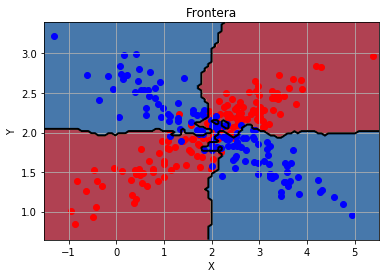

<Figure size 432x288 with 0 Axes>

example2:


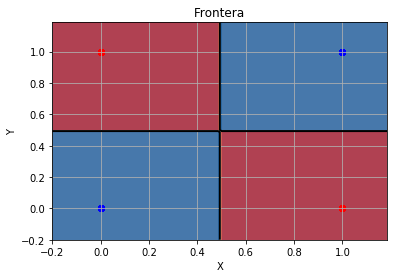

<Figure size 432x288 with 0 Axes>

example3:


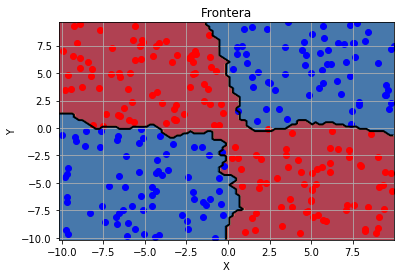

<Figure size 432x288 with 0 Axes>

example4:


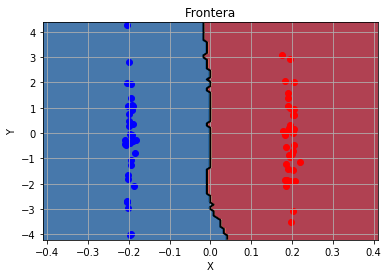

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

% matplotlib inline

from ClasificadorVecinosProximos import ClasificadorVecinosProximos
from Datos import Datos
from ValidacionSimple import ValidacionSimple
from plotModel import plotModel

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4']

val = ValidacionSimple(70)
knn = ClasificadorVecinosProximos(5)

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    
    print(nombre_fichero, ":", sep='')
    
    val.creaParticiones(datos.datos)
    datosTrain = datos.extraeDatos(val.particiones[-1].indicesTrain)
    datosTest = datos.extraeDatos(val.particiones[-1].indicesTest)
    knn.entrenamiento(datosTrain, datos.nominalAtributos, datos.diccionarios)
    
    ii = val.particiones[-1].indicesTrain
    x = datos.datos[ii, 0]
    y = datos.datos[ii, 1]
    clase = datos.datos[ii, -1]
    plotModel(x, y, clase != 0, knn, "Frontera", datos.diccionarios)
    
    plt.figure()
    plt.show()

Vemos que en example 1 los datos están agrupados en torno a dos "rectas" que se cruzan formando una x.
Knn clasifica muy bien los datos lejos del cruce de las 2 rectas y en el cruce tiene más fallos.

En example 2 knn clasifica perfectamente ya que los datos están agrupados en 4 posiciones y no hay solapamientos de clases en las mismas posiciones

En example 3 los datos son similares a los de example2, pero en vez de estar agrupados en 4 posiciones, están divididos en 4 regiones, teniendo las opuestas la misma clasificación. Vemos que knn aproxima bastante bien las regiones de cada clase.

En example4 los datos están en dos rectas paralelas y knn los clasifica a la perfección

**Vamos a obtener las gráficas de para regresión logística con nepocas=100, const=0.8**

example1:


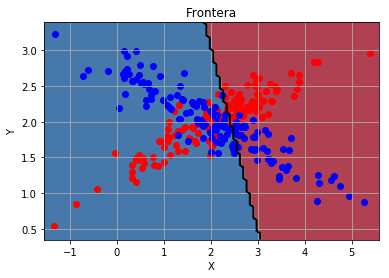

<Figure size 432x288 with 0 Axes>

example2:


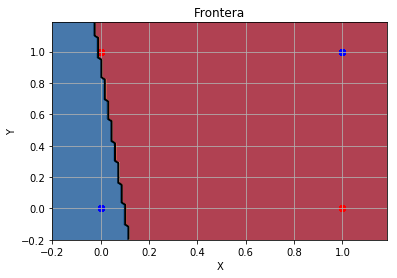

<Figure size 432x288 with 0 Axes>

example3:


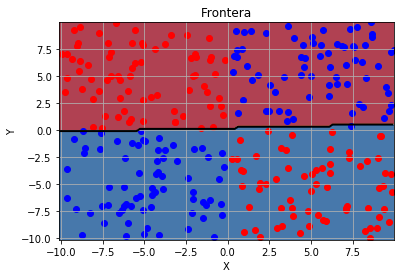

<Figure size 432x288 with 0 Axes>

example4:


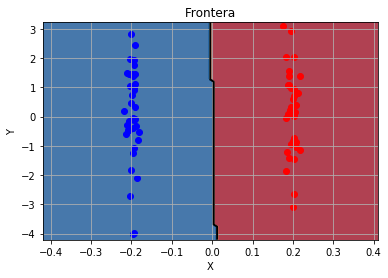

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

% matplotlib inline

from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from Datos import Datos
from ValidacionSimple import ValidacionSimple
from plotModel import plotModel

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4']

val = ValidacionSimple(70)
reg = ClasificadorRegresionLogistica()

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    
    print(nombre_fichero, ":", sep='')
    
    val.creaParticiones(datos.datos)
    datosTrain = datos.extraeDatos(val.particiones[-1].indicesTrain)
    datosTest = datos.extraeDatos(val.particiones[-1].indicesTest)
    reg.entrenamiento(datosTrain, datos.nominalAtributos, datos.diccionarios, nepocas=100, const=0.8)
    
    ii = val.particiones[-1].indicesTrain
    x = datos.datos[ii, 0]
    y = datos.datos[ii, 1]
    clase = datos.datos[ii, -1]
    plotModel(x, y, clase != 0, reg, "Frontera", datos.diccionarios)
    
    plt.figure()
    plt.show()

Vemos que regresión logística no es el clasificador apropiado para los conjuntos de datos 1,2 y 3, ya que se puede ver a simple vista que usando sólo una recta no se pueden dividir las regiones en las que se ubican las clases. Sin embargo vemos cómo el algoritmo, aún no pudiendo clasificar bien estos datos, sí que encuentra una "buena" recta que los divide.

En example4, que los datos están agrupados en dos líneas paralelas, regresión logística clasifica a la perfección, tomando la recta que los divide en dos regiones